In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
s1 = pd.read_csv("results/results_S1.csv", index_col="Unnamed: 0")
s2 = pd.read_csv("results/results_S2.csv", index_col="Unnamed: 0")
s3 = pd.read_csv("results/results_S3.csv", index_col="Unnamed: 0")
s4 = pd.read_csv("results/results_S4.csv", index_col="Unnamed: 0")

In [3]:
mxs = [0.1, 0.2, 0.3, 0.4, 0.5]
mps = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
crs = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

index = l = [(i, j, k) for i in mxs for j in mps for k in crs]

TSCC = pd.DataFrame([s1.TSCC, s2.TSCC, s3.TSCC, s4.TSCC]).T
TSCC.columns = ["S1", "S2", "S3", "S4"]
TSCC.index = index

TSCC_rel = (TSCC - TSCC.min())/TSCC.min()
TSCC_rel['MEAN'] = TSCC_rel.mean(axis=1)

TSCC.to_csv("TSCC.csv", header=True, index=True)
TSCC_rel.to_csv("TSCC_rel.csv", header=True, index=True)

mxs = [0.1, 0.2, 0.3, 0.4, 0.5]
mps = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
crs = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

index = l = [(i, j, k) for i in mxs for j in mps for k in crs]

TSCC = pd.DataFrame([s1.TSCC, s2.TSCC, s3.TSCC, s4.TSCC]).T
TSCC.columns = ["S1", "S2", "S3", "S4"]
TSCC.index = index

TSCC_rel = (TSCC - TSCC.min())/TSCC.min()
TSCC_rel['MEAN'] = TSCC_rel.mean(axis=1)

In [4]:
index = list(TSCC_rel.index)
TSCC_rel["MX"] = [x[0] for x in index]
TSCC_rel["MP"] = [x[1] for x in index]
TSCC_rel["CR"] = [x[2] for x in index]

# Rearrange to see trends
sort1 = TSCC_rel.sort_values(by=['CR', 'MP'])
sort2 = TSCC_rel.sort_values(by=['CR', 'MX'])
sort3 = TSCC_rel.sort_values(by=['MP', 'MX'])

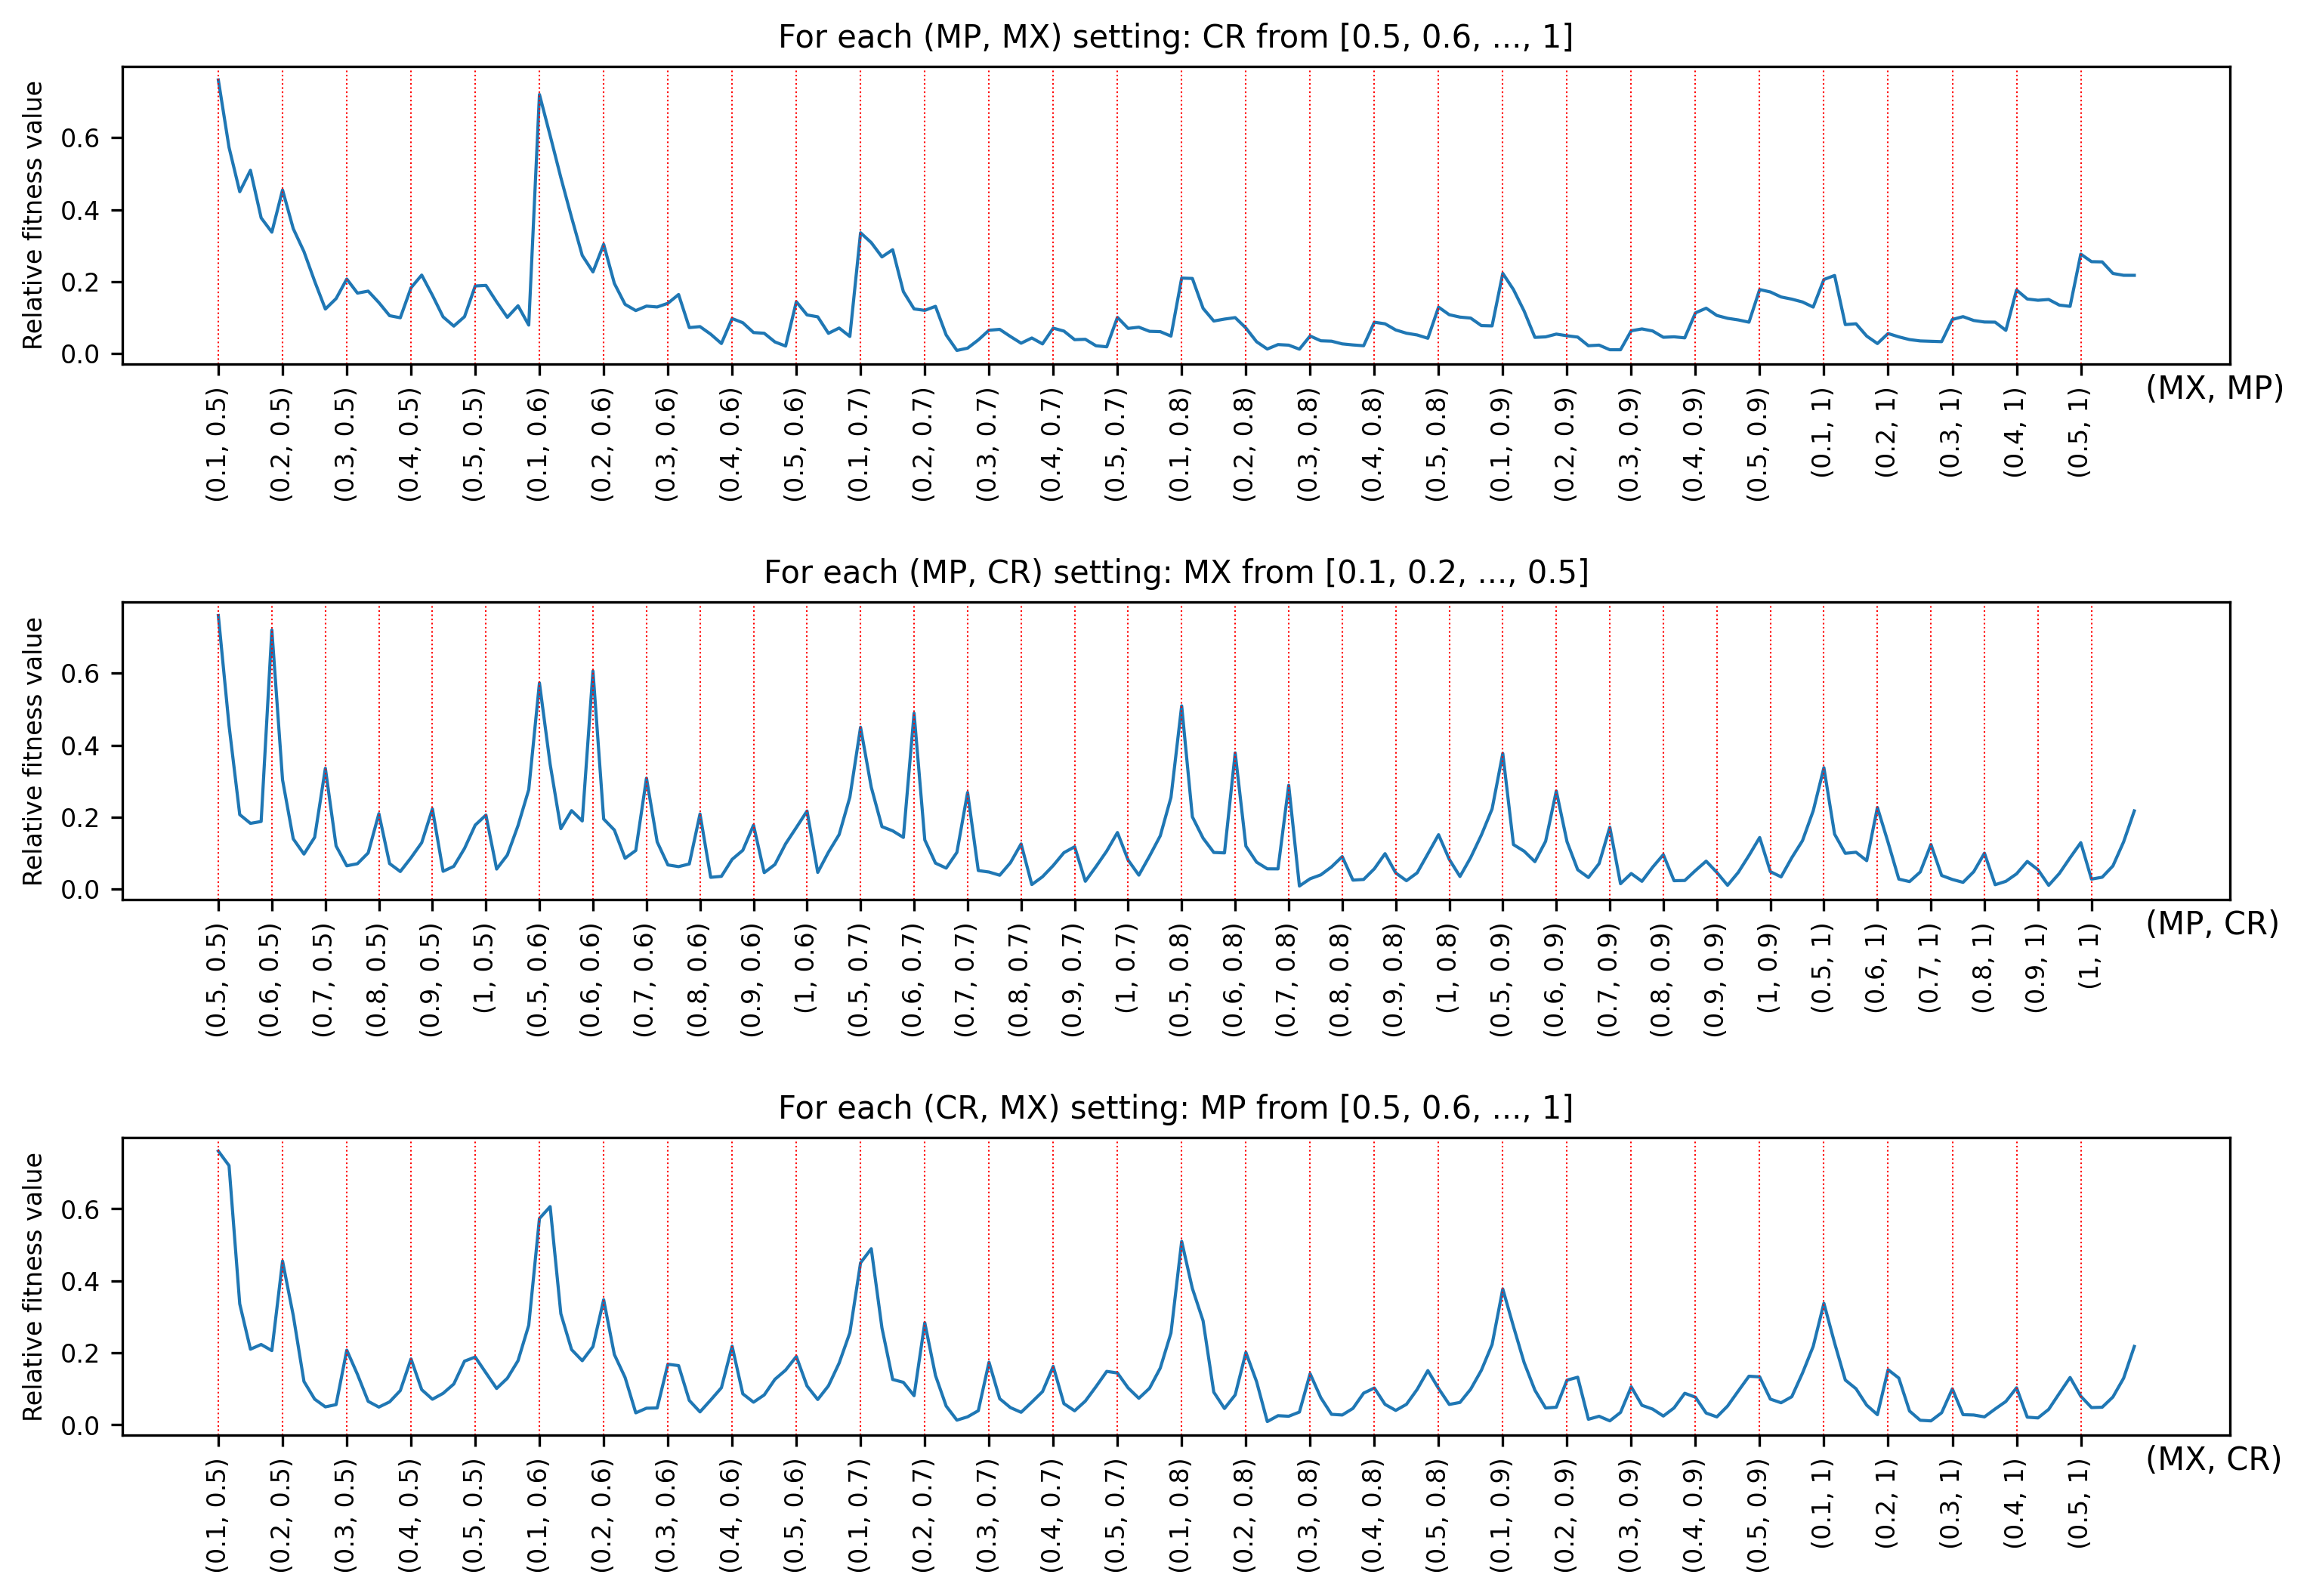

In [45]:
fig = plt.figure(figsize=(12, 8), dpi=300)
gs = fig.add_gridspec(3, 1)

index = sort1.index.values
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot([*range(len(sort1))], sort1[['MEAN']], linewidth=1)
ax1.set_title('For each (MP, CR) setting: MX from [0.1, 0.2, ..., 0.5]', fontsize=10)
ax1.tick_params(axis='both', which='major', labelsize=8)
for x in [i for i in [*range(len(sort1))] if i%5==0]:
    ax1.axvline(x, linewidth=0.5, color="red", linestyle="dotted")
ax1.set_xticks([i for i in [*range(len(sort1))] if i%5==0])
ax1.set_xticklabels(["({}, {})".format(l[1], l[2]) for i, l in enumerate(index) if i%5==0], rotation=90)
ax1.set_ylabel("Relative fitness value", fontsize=8)
ax1.text(x=180, y=-0.1, s="(MP, CR)", verticalalignment="center")

index = sort2.index.values
ax2 = fig.add_subplot(gs[2, 0])
ax2.plot([*range(len(sort1))], sort2[['MEAN']], linewidth=1)
ax2.set_title('For each (CR, MX) setting: MP from [0.5, 0.6, ..., 1]', fontsize=10)
ax2.tick_params(axis='both', which='major', labelsize=8)
for x in [i for i in [*range(len(sort2))] if i%6==0]:
    ax2.axvline(x, linewidth=0.5, color="red", linestyle="dotted")
ax2.set_xticks([i for i in [*range(len(sort2))] if i%6==0])
ax2.set_xticklabels(["({}, {})".format(l[0], l[2]) for i, l in enumerate(index) if i%6==0], rotation=90)
ax2.set_ylabel("Relative fitness value", fontsize=8)
ax2.text(x=180, y=-0.1, s="(MX, CR)", verticalalignment="center")

index = sort3.index.values
ax3 = fig.add_subplot(gs[0, 0])
ax3.plot([*range(len(sort3))], sort3[['MEAN']], linewidth=1)
ax3.set_title('For each (MP, MX) setting: CR from [0.5, 0.6, ..., 1]', fontsize=10)
ax3.tick_params(axis='both', which='major', labelsize=8)
for x in [i for i in [*range(len(sort3))] if i%6==0]:
    ax3.axvline(x, linewidth=0.5, color="red", linestyle="dotted")
ax3.set_xticks([i for i in [*range(len(sort3))] if i%6==0])
ax3.set_xticklabels(["({}, {})".format(l[0], l[1]) for i, l in enumerate(index) if i%6==0], rotation=90)
ax3.set_ylabel("Relative fitness value", fontsize=8)
ax3.text(x=180, y=-0.1, s="(MX, MP)", verticalalignment="center")


plt.subplots_adjust(hspace=0.8)
plt.savefig("parameters.png")

In [ ]:
TSCC.to_csv("TSCC.csv", header=True, index=True)
TSCC_rel.to_csv("TSCC_rel.csv", header=True, index=True)


plt.figure(figsize=(8, 4), dpi=300)
TSCC_rel.plot()
plt.legend(loc="upper right")
plt.xlabel("Search space")
plt.ylabel("Relative Frequency of Solution")
plt.margins(0,0)